In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_csv('')

### 변수 정리
0. days_after_registration ------- 회원 가입 후 지난 날짜
1. userid ------------------------- 유저아이디
2. userlevel ---------------------- 유저레벨
3. playtime_sec ------------------ 플레이 시간
4. sales -------------------------- 구매 목록 혹은 ??? 아마 과금량일 것
5. registration_date ------------- 회원가입 날짜
6. country ----------------------- 국적
7. source ------------------------ 구글, 페이스북 등 유저가 유입된 매체
8. marketing_cost_per_user ---- 한 유저 당 소요된 마케팅 비용

### 1. 집중할 대상 국가(들)을 선정
### 2. 마케팅 비용을 효과적으로 쓰기 위한 적절한 예산 비중 및 매체 운영방식을 제안하자

### - 포함해야 할 내용
1. 좋은 유저를 정의할 것
2. 좋은 매체를 정의할 것(페이스북, 구글 등)
3. 좋은 국가를 정의할 것
4. 선정한 국가(들)의 선정 근거
5. 적정 마케팅 예산 비중 및 매체 별 예산 비중
6. 집중 국가(들) 선정 시 예상되는 향후 매출 성장세

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620657 entries, 0 to 620656
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   days_after_registration  620657 non-null  int64 
 1   userid                   620657 non-null  int64 
 2   userlevel                620657 non-null  int64 
 3   playtime_sec             620657 non-null  int64 
 4   sales                    620657 non-null  int64 
 5   registration_date        620657 non-null  object
 6   country                  620657 non-null  object
 7   source                   620657 non-null  object
 8   marketing_cost_per_user  620657 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 42.6+ MB


In [4]:
data.head(20)

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user
0,0,375377,1,148,0,2020-09-23,FR,Organic,0
1,0,295842,1,67,0,2020-09-23,DE,Organic,0
2,0,229618,1,36,0,2020-09-23,DE,Organic,0
3,0,335545,1,116,0,2020-09-23,FR,Organic,0
4,0,300981,1,104,0,2020-09-23,FR,Organic,0
5,0,320200,1,20,0,2020-09-23,FR,Organic,0
6,0,328469,1,151,0,2020-09-23,DE,Organic,0
7,0,336626,1,31,0,2020-09-23,IL,Organic,0
8,0,338676,1,165,0,2020-09-07,RU,Organic,0
9,89,290942,27,1097,102253,2020-09-26,RU,Organic,0


### 중복된 유저들 처리 (userid 기준으로)

In [5]:
copy_data = data.copy()
copy_data = copy_data.drop_duplicates(['userid'], keep='first') # 일단 중복되는 것 처음만 남기고 삭제

In [6]:
copy_data.head(20)

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user
0,0,375377,1,148,0,2020-09-23,FR,Organic,0
1,0,295842,1,67,0,2020-09-23,DE,Organic,0
2,0,229618,1,36,0,2020-09-23,DE,Organic,0
3,0,335545,1,116,0,2020-09-23,FR,Organic,0
4,0,300981,1,104,0,2020-09-23,FR,Organic,0
5,0,320200,1,20,0,2020-09-23,FR,Organic,0
6,0,328469,1,151,0,2020-09-23,DE,Organic,0
7,0,336626,1,31,0,2020-09-23,IL,Organic,0
8,0,338676,1,165,0,2020-09-07,RU,Organic,0
9,89,290942,27,1097,102253,2020-09-26,RU,Organic,0


In [7]:
len(copy_data['userid'].unique())

183197

In [8]:
copy_data.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user
count,183197.000000,183197.000000,183197.000000,183197.000000,1.831970e+05,1.831970e+05
mean,2.361916,300012.564332,2.917395,1765.623886,1.247942e+02,4.906903e+03
std,9.597031,57715.874787,3.773189,3874.477971,8.056602e+03,3.654942e+04
min,0.000000,200000.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,0.000000,250051.000000,1.000000,221.000000,0.000000e+00,0.000000e+00
50%,0.000000,300031.000000,1.000000,552.000000,0.000000e+00,0.000000e+00
75%,0.000000,349998.000000,3.000000,1564.000000,0.000000e+00,1.916000e+03
max,90.000000,400000.000000,33.000000,85517.000000,2.853293e+06,4.947661e+06


In [9]:
# 나라별 유저수 구하기
copy_data.groupby('country').count()

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,source,marketing_cost_per_user
country,,,,,,,,
AE,341,341,341,341,341,341,341,341
BR,871,871,871,871,871,871,871,871
CA,26259,26259,26259,26259,26259,26259,26259,26259
DE,7842,7842,7842,7842,7842,7842,7842,7842
EG,6031,6031,6031,6031,6031,6031,6031,6031
FR,7688,7688,7688,7688,7688,7688,7688,7688
HK,2870,2870,2870,2870,2870,2870,2870,2870
ID,563,563,563,563,563,563,563,563
IL,966,966,966,966,966,966,966,966


### 먼저 나라별로 그룹화
- 나라별로 데이터를 분할하여 관리하는 것이 데이터 분석에 편할 것이라 판단

In [10]:
AEdata = copy_data.groupby('country').get_group('AE') # 1. 아랍에미리트
BRdata = copy_data.groupby('country').get_group('BR') # 2. 브라질
CAdata = copy_data.groupby('country').get_group('CA') # 3. 캐나다
DEdata = copy_data.groupby('country').get_group('DE') # 4. 독일
EGdata = copy_data.groupby('country').get_group('EG') # 5. 이집트
FRdata = copy_data.groupby('country').get_group('FR') # 6. 프랑스
HKdata = copy_data.groupby('country').get_group('HK') # 7. 홍콩
IDdata = copy_data.groupby('country').get_group('ID') # 8. 인도네시아
ILdata = copy_data.groupby('country').get_group('IL') # 9. 이스라엘
ITdata = copy_data.groupby('country').get_group('IT') # 10. 이탈리아
JPdata = copy_data.groupby('country').get_group('JP') # 11. 일본
KRdata = copy_data.groupby('country').get_group('KR') # 12. 한국
MYdata = copy_data.groupby('country').get_group('MY') # 13. 말레이시아
RUdata = copy_data.groupby('country').get_group('RU') # 14. 러시아
TWdata = copy_data.groupby('country').get_group('TW') # 15. 대만
UKdata = copy_data.groupby('country').get_group('UK') # 16. 영국
USdata = copy_data.groupby('country').get_group('US') # 17. 미국

In [11]:
AEdata # 데이터 확인

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user
111,0,378487,5,113,0,2020-09-10,AE,Organic,0
124,27,206177,18,1436,0,2020-09-27,AE,Organic,0
184,0,345102,5,875,0,2020-09-15,AE,Organic,0
2600,0,247182,1,297,0,2020-09-06,AE,Organic,0
3239,0,306628,1,284,0,2020-09-25,AE,Organic,0
...,...,...,...,...,...,...,...,...,...
609337,0,230559,1,4,0,2020-09-30,AE,Facebook,234826
620653,0,264902,1,300,0,2020-09-25,AE,Facebook,183940
620654,0,369262,1,76,0,2020-09-25,AE,Facebook,183940
620655,0,296996,3,1836,0,2020-09-25,AE,Facebook,183940


#### 나라별로 정렬된 데이터프레임을 만들어 관리할 것.

In [12]:
per_country_df = pd.DataFrame({'country': ['AE','BR','CA','DE','EG','FR','HK','ID','IL','IT','JP','KR',
                                           'MY','RU','TW','UK','US']})

In [13]:
per_country_df

,country
0,AE
1,BR
2,CA
3,DE
4,EG
5,FR
6,HK
7,ID
8,IL
9,IT


In [14]:
print("아랍에미리트 유저 수:", len(AEdata))
print("브라질 유저 수:", len(BRdata))
print("캐나다 유저 수:", len(CAdata))
print("독일 유저 수:", len(DEdata))
print("이집트 유저 수:", len(EGdata))
print("프랑스 유저 수:", len(FRdata))
print("홍콩 유저 수:", len(HKdata))
print("인도네시아 유저 수:", len(IDdata))
print("이스라엘 유저 수:", len(ILdata))
print("이탈리아 유저 수:", len(ITdata))
print("일본 유저 수:", len(JPdata))
print("한국 유저 수:", len(KRdata))
print("말레이시아 유저 수:", len(MYdata))
print("러시아 유저 수:", len(RUdata))
print("대만 유저 수:", len(TWdata))
print("영국 유저 수:", len(UKdata))
print("미국 유저 수:", len(USdata))

아랍에미리트 유저 수: 341
브라질 유저 수: 871
캐나다 유저 수: 26259
독일 유저 수: 7842
이집트 유저 수: 6031
프랑스 유저 수: 7688
홍콩 유저 수: 2870
인도네시아 유저 수: 563
이스라엘 유저 수: 966
이탈리아 유저 수: 2528
일본 유저 수: 11781
한국 유저 수: 9076
말레이시아 유저 수: 279
러시아 유저 수: 24284
대만 유저 수: 5486
영국 유저 수: 11834
미국 유저 수: 64498


In [15]:
D = pd.DataFrame({'user_num': [len(AEdata), len(BRdata), len(CAdata), len(DEdata), len(EGdata), 
                               len(FRdata), len(HKdata), len(IDdata), len(ILdata), len(ITdata), 
                               len(JPdata), len(KRdata), len(MYdata), len(RUdata), len(TWdata), 
                               len(UKdata), len(USdata)]})

In [16]:
per_country_df = per_country_df.join(D)

#### 나라별 인기도 계산하기 위해 국가 별 인구수 대비 유저수를 구해보자

In [17]:
# 인구단위: 만명
print("아랍에미리트 규모:", len(AEdata)/977) # 아랍에미리트 인구 수: 977만명
print("브라질 규모:", len(BRdata)/21100)
print("캐나다 규모:", len(CAdata)/3759)
print("독일 규모:", len(DEdata)/8302)
print("이집트 규모:", len(EGdata)/10040)
print("프랑스 규모:", len(FRdata)/6706)
print("홍콩 규모:", len(HKdata)/750)
print("인도네시아 규모:", len(IDdata)/27060)
print("이스라엘 규모:", len(ILdata)/905)
print("이탈리아 규모:", len(ITdata)/6036)
print("일본 규모:", len(JPdata)/12630)
print("한국 규모:", len(KRdata)/5171)
print("말레이시아 규모:", len(MYdata)/3195)
print("러시아 규모:", len(RUdata)/14440)
print("대만 규모:", len(TWdata)/2357)
print("영국 규모:", len(UKdata)/6665)
print("미국 규모:", len(USdata)/32820)

아랍에미리트 규모: 0.3490276356192426
브라질 규모: 0.04127962085308057
캐나다 규모: 6.985634477254589
독일 규모: 0.9445916646591183
이집트 규모: 0.6006972111553784
프랑스 규모: 1.1464360274381151
홍콩 규모: 3.8266666666666667
인도네시아 규모: 0.02080561714708056
이스라엘 규모: 1.0674033149171271
이탈리아 규모: 0.4188204108681246
일본 규모: 0.9327790973871734
한국 규모: 1.7551730806420422
말레이시아 규모: 0.08732394366197183
러시아 규모: 1.6817174515235458
대만 규모: 2.3275350021213406
영국 규모: 1.775543885971493
미국 규모: 1.9652041438147472


In [18]:
D = pd.DataFrame({'user_density' : [len(AEdata)/977, len(BRdata)/21100, len(CAdata)/3759, len(DEdata)/8302,
                  len(EGdata)/10040, len(FRdata)/6706, len(HKdata)/750, len(IDdata)/27060, len(ILdata)/905, 
                  len(ITdata)/6036, len(JPdata)/12630, len(KRdata)/5171, len(MYdata)/3195, 
                  len(RUdata)/14440, len(TWdata)/2357, len(UKdata)/6665, len(USdata)/32820]})
per_country_df = per_country_df.join(D)

In [19]:
per_country_df

,country,user_num,user_density
0,AE,341,0.349028
1,BR,871,0.041280
2,CA,26259,6.985634
3,DE,7842,0.944592
4,EG,6031,0.600697
5,FR,7688,1.146436
6,HK,2870,3.826667
7,ID,563,0.020806
8,IL,966,1.067403
9,IT,2528,0.418820


## - 지금까지의 과정을 통해 집중할 대상 국가를 선정해볼 것.
### 국가 선정 기준
1. 유저 수가 일정규모 이상인 국가들일 것.
   - 10000명 이상
2. 인구 수 대비 유저 수 비율이 일정 수준 이상이어야 할 것.
   - 1.5 이상

In [20]:
select_country = []

### 위 2가지 기준 조건을 사용

In [21]:
for i in range(len(per_country_df)):
    if per_country_df['user_num'][i] >= 10000: # 10000명 이상의 유저가 있는 국가의 경우
        if per_country_df['user_density'][i] >= 1.5: # 인구 대비 유저수 비율이 1.5이상인 경우
            select_country.append([per_country_df['country'][i], per_country_df['user_num'][i], per_country_df['user_density'][i]])

In [22]:
select_country

[['CA', 26259, 6.985634477254589],
 ['RU', 24284, 1.6817174515235458],
 ['UK', 11834, 1.775543885971493],
 ['US', 64498, 1.9652041438147472]]

### 위에서 제시한 2가지 기준에 맞는 국가가 위와 같이 4개가 나옴
- 이에 위 4개 국가를 대상으로 분석 진행

In [23]:
col_name = ['country', 'user_num', 'user_density']
select_country_df = pd.DataFrame(select_country, columns = col_name)

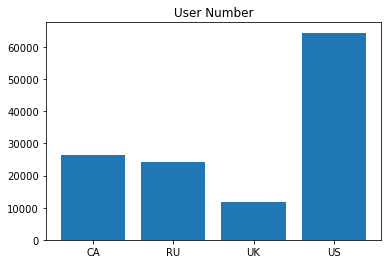

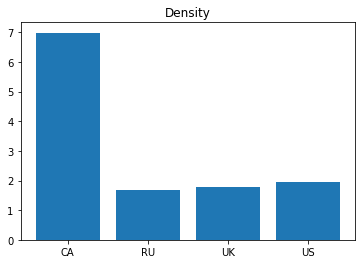

In [24]:
plt.bar(select_country_df['country'],select_country_df['user_num'])
plt.title('User Number')
plt.show()
plt.bar(select_country_df['country'],select_country_df['user_density'])
plt.title('Density')
plt.show()

### 먼저 CA에서 인구 수 대비 유저수 비율이 다른 나라들에 비해 월등히 높다는 것을 볼 수 있다.
- 이에 CA부터 분석해보려 한다.

### 국가별 분석에 들어가기 전, 먼저 좋은 유저에 대한 기준을 세워보았다.
1. 가입 후 10일이 지난 유저
   - 10일 이상 활동하면 분석할 만한 패턴이 쌓일 것이라 판단
   - 10일을 기준으로 지속 유저와 신규 유저로 구분하여 분석
2. 플레이 시간과 가입후 지난 일 수를 대비하여 유저의 활동성 및 지속성을 계산한 값이 일정값 이상인 유저
   - (플레이 시간)/(가입 후 지난 일 수) 값을 Playtime days after 변수로 저장하였음(신규 유저 경우, -1값으로 통일)

# ------------------------------------------------------------------------

### 1. CA 탐색

In [25]:
CAdata.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user
count,26259.000000,26259.000000,26259.000000,26259.000000,2.625900e+04,26259.000000
mean,2.587913,300273.613618,2.497925,1381.006093,3.455171e+02,8454.363761
std,9.999783,57896.154098,3.502416,3276.333148,1.906494e+04,7536.568261
min,0.000000,200000.000000,1.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,250289.500000,1.000000,175.000000,0.000000e+00,0.000000
50%,0.000000,300730.000000,1.000000,439.000000,0.000000e+00,6410.000000
75%,0.000000,350659.500000,2.000000,1173.000000,0.000000e+00,14020.000000
max,90.000000,399995.000000,31.000000,70996.000000,2.853293e+06,30577.000000


#### 좋은 유저의 규모는 얼마나 되는지 확인
- 위에 제시된 첫 번째 기준을 만족하는 유저의 규모를 확인할 것
- 그리고 (플레이 시간)/(가입 후 지난 날짜)를 구해 데이터프레임에 추가할 것

In [37]:
Playtime_days_after = []
for i in range(len(CAdata)):
    if CAdata.iloc[i]['days_after_registration'] >= 10: # 가입한지 10일이 지난 경우
        Playtime_days_after.append(CAdata.iloc[i]['playtime_sec']/CAdata.iloc[i]['days_after_registration'])
    else: # 가입한지 10일이 안 된 유저
        Playtime_days_after.append(-1)

In [38]:
CAdata_2 = CAdata.copy()

In [39]:
# 데이터프레임에 Playtime days after 열 추가
CAdata_2['Playtime_days_after'] = Playtime_days_after

In [40]:
CAdata_2

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
177,0,265219,1,194,0,2020-09-24,CA,Organic,0,-1.0
178,0,328537,1,2,0,2020-09-05,CA,Organic,0,-1.0
193,0,221612,1,54,0,2020-09-06,CA,Organic,0,-1.0
195,0,383562,1,33,0,2020-09-13,CA,Organic,0,-1.0
199,0,252122,2,2099,0,2020-09-18,CA,Organic,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
615398,0,252295,1,289,0,2020-09-15,CA,Google,13142,-1.0
615401,1,227533,1,142,0,2020-09-15,CA,Google,13142,-1.0
615403,0,280262,1,463,0,2020-09-15,CA,Google,13142,-1.0
615404,0,391982,1,164,0,2020-09-15,CA,Google,13142,-1.0


In [41]:
CAdata_2.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,26259.000000,26259.000000,26259.000000,26259.000000,2.625900e+04,26259.000000,26259.000000
mean,2.587913,300273.613618,2.497925,1381.006093,3.455171e+02,8454.363761,7.158290
std,9.999783,57896.154098,3.502416,3276.333148,1.906494e+04,7536.568261,81.492765
min,0.000000,200000.000000,1.000000,0.000000,0.000000e+00,0.000000,-1.000000
25%,0.000000,250289.500000,1.000000,175.000000,0.000000e+00,0.000000,-1.000000
50%,0.000000,300730.000000,1.000000,439.000000,0.000000e+00,6410.000000,-1.000000
75%,0.000000,350659.500000,2.000000,1173.000000,0.000000e+00,14020.000000,-1.000000
max,90.000000,399995.000000,31.000000,70996.000000,2.853293e+06,30577.000000,4975.000000


#### 위 내용을 통해 CA 유저의 75% 이상이 10일 미만의 신규가입자라고 볼 수 있다.
- 먼저 신규가입 한 유저(Playtime_days_after 값이 -1인 유저)를 제외한 정확한 유저수가 얼마나 되는지 찾아보자

In [42]:
idx = CAdata_2[CAdata_2['Playtime_days_after'] == -1].index
CAdata_3 = CAdata_2.drop(idx)

In [43]:
CAdata_3 # 10일 이상 지속 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
526,20,206788,12,1800,0,2020-09-28,CA,Organic,0,90.000000
614,32,243770,1,300,0,2020-09-20,CA,Organic,0,9.375000
1307,35,237505,1,49,0,2020-09-18,CA,Organic,0,1.400000
1455,11,216271,10,318,0,2020-09-14,CA,Organic,0,28.909091
1838,74,283908,26,26697,0,2020-09-21,CA,Organic,0,360.770270
...,...,...,...,...,...,...,...,...,...,...
615015,65,342797,24,20186,0,2020-09-15,CA,Google,13142,310.553846
615146,20,399186,12,532,0,2020-09-15,CA,Google,13142,26.600000
615224,21,382514,15,2643,0,2020-09-15,CA,Google,13142,125.857143
615279,45,392326,6,833,0,2020-09-15,CA,Google,13142,18.511111


- 위 결과를 토대로 CA 유저는 총 26259명 중 1692명이 10일 이상 지속 유저임을 알 수 있다. 
- 이에 유입 매체 비율이 어떤지 알아보았다.

### * 참고

In [44]:
# CA의 10일 이상 지속 유저 비율 계산
CA_maintained = len(CAdata_3)/len(CAdata_2)*100
CA_maintained

6.44350508397121

In [45]:
CAdata_2['source'].value_counts()

Facebook     10422
Organic       6789
Google        5592
Instagram     3456
Name: source, dtype: int64

- 페이스북을 통해 유입된 양이 다른 매체에 비해 2배~3배 정도 많은 것을 볼 수 있다. 이에 신규 유저는 페이스북으로 많이 유입될 것이라고 가설을 세워 확인해보았다.
- 신규 유저들을 찾아보았다.
- 그리고 이를 토대로 유입 매체 비율을 살펴보았다.

In [46]:
# 신규 유저들을 토대로 매체별 비율을 보자 
idx = CAdata_2[CAdata_2['Playtime_days_after'] != -1].index
CAdata_4 = CAdata_2.drop(idx)

In [47]:
CAdata_4 # 신규 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
177,0,265219,1,194,0,2020-09-24,CA,Organic,0,-1.0
178,0,328537,1,2,0,2020-09-05,CA,Organic,0,-1.0
193,0,221612,1,54,0,2020-09-06,CA,Organic,0,-1.0
195,0,383562,1,33,0,2020-09-13,CA,Organic,0,-1.0
199,0,252122,2,2099,0,2020-09-18,CA,Organic,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
615398,0,252295,1,289,0,2020-09-15,CA,Google,13142,-1.0
615401,1,227533,1,142,0,2020-09-15,CA,Google,13142,-1.0
615403,0,280262,1,463,0,2020-09-15,CA,Google,13142,-1.0
615404,0,391982,1,164,0,2020-09-15,CA,Google,13142,-1.0


      source  user_num
0    Organic       653
1   Facebook       529
2     Google       328
3  Instagram       182 



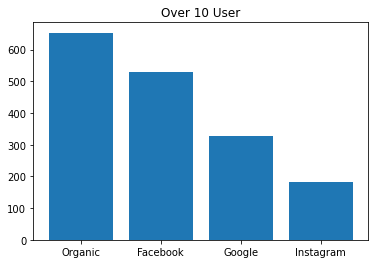

      source  user_num
0   Facebook      9893
1    Organic      6136
2     Google      5264
3  Instagram      3274


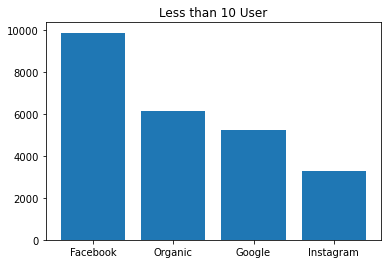

In [61]:
# 다루기 쉽도록 데이터 프레임으로 변환시킴
# 지속 유저의 source 비율
CAdata_3_source = pd.DataFrame(CAdata_3['source'].value_counts())
CAdata_3_source = CAdata_3_source.reset_index()
CAdata_3_source.columns = ['source', 'user_num']
print(CAdata_3_source, '\n')
plt.title('Over 10 User')
plt.bar(CAdata_3_source['source'], CAdata_3_source['user_num'])
plt.show()

# 신규 유저의 source 비율
CAdata_4_source = pd.DataFrame(CAdata_4['source'].value_counts())
CAdata_4_source = CAdata_4_source.reset_index()
CAdata_4_source.columns = ['source', 'user_num']
print(CAdata_4_source)
plt.title('Less than 10 User')
plt.bar(CAdata_4_source['source'], CAdata_4_source['user_num'])
plt.show()

- 지속적인 유저는 organic에서 가장 많이, 다음으로 facebook을 통해 유입된 것을 볼 수 있다.
- 신규가입 유저의 source비율에선 facebook과 organic의 비율이 반대인 것을 확인할 수 있다.
- 위 결과를 통해 유저를 지속시키는데 영향을 미치는 source는 organic이라고 판단할 수 있다.
- organic을 '직접 어플 다운로드'로 가정하고 판단하였을 때, 좋은 유저들은 organic의 경로를 통해 유입되는 것이라 판단할 수 있다.

### sales변수 활용하여 user_num등의 변수와 상관관계가 있는지 확인해 볼 것.

- 예를 들어 CA 같은 경우엔 변수들 간의 어떤 상관계수가 있는지 확인해보고 이를 다른 국가들과 비교해서 결론을 도출해보자.

In [49]:
# 전체 유저중 과금 비율확인
idx = CAdata_2[CAdata_2['sales'] == 0].index
CAdata_2_sales = CAdata_2.drop(idx)
print("전체 유저 중 과금유저 비율 = ", len(CAdata_2_sales)/len(CAdata))

# 지속 유저중 과금 비율 확인
idx = CAdata_3[CAdata_3['sales'] == 0].index
CAdata_3_sales = CAdata_3.drop(idx)
print("지속 유저 중 과금유저 비율 = ", len(CAdata_3_sales)/len(CAdata_3))


# 신규 유저중 과금 비율 확인
idx = CAdata_4[CAdata_4['sales'] == 0].index
CAdata_4_sales = CAdata_4.drop(idx)
print("당일 이탈 유저 중 과금유저 비율 = ", len(CAdata_4_sales)/len(CAdata_4))

전체 유저 중 과금유저 비율 =  0.01146273658555162
지속 유저 중 과금유저 비율 =  0.03546099290780142
당일 이탈 유저 중 과금유저 비율 =  0.009809907599625514


- 위 결과를 통해 과금 비율은 지속 유저가 약 3.5%로 신규 유저보다 높은 것을 볼 수 있다.
- 이에 지속 유저를 바탕으로 과금 데이터 분석을 진행하는 것이 유의미할 것이라 판단하여 진행하였다.

### 과금(sales)와 관련된 변수가 무엇이 있을지 선정해보았다.
1. source : 과금의 접근성이 플랫폼별로 다를 수 있을것이라 예상하였다.
2. marketing cost per user : 과금과 직접적인 연관이 있을 것이라 예상하였다.
3. playtime : 오래하는 유저일수록 과금이 높을 것이라 예상하였다.
4. userlevel : 숙련도가 높은 유저일수록 과금이 높을 것이라 예상하였다.
5. Playtime_days_after : 이 변수를 통해 유저가 하루에 얼마나 몰입하는지 가늠할 수 있기 때문에 추가하였다.
- source의 경우를 제외한 2, 3, 4, 5는 수치형 데이터이기 때문에 상관분석을 통해 확인할 것.

### 1. source

In [50]:
# 지속 유저 중 과금 유저의 데이터
CAdata_3_sales.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,60.00000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,35.25000,306750.500000,19.783333,12251.950000,35585.016667,7129.366667,540.773275
std,24.44754,62731.849202,6.308702,10688.447444,55938.811187,8999.674039,748.966680
min,10.00000,207481.000000,3.000000,894.000000,1150.000000,0.000000,44.700000
25%,17.00000,248291.000000,14.750000,4254.750000,4880.000000,0.000000,139.483773
50%,26.00000,319258.000000,21.500000,8884.000000,12528.000000,2247.500000,320.753788
75%,52.00000,360359.750000,25.000000,16228.250000,44776.750000,14769.750000,635.509615
max,90.00000,398953.000000,31.000000,50695.000000,322273.000000,26796.000000,4975.000000


In [51]:
# 지속 유저 중 과금 유저의 플랫폼
CAdata_3_sales_source = pd.DataFrame(CAdata_3_sales['source'].value_counts())
CAdata_3_sales_source = CAdata_3_sales_source.reset_index()
CAdata_3_sales_source.columns = ['source', 'user_num']
print(CAdata_3_sales_source, '\n')

      source  user_num
0    Organic        30
1     Google        15
2   Facebook        13
3  Instagram         2 



In [52]:
CAdata_3_source

,source,user_num
0,Organic,653
1,Facebook,529
2,Google,328
3,Instagram,182


In [53]:
# 지속 과금 유저의 비율이 유입경로 별로 어떤지 확인
print("각 source 별로 유입된 유저중 과금유저 비율")
ratio_source = []
for i in range(len(CAdata_3_source)):
    for j in range(len(CAdata_3_sales_source)):
        if CAdata_3_source['source'][i] == CAdata_3_sales_source['source'][j]:
            ratio_source.append([CAdata_3_source['source'][i], CAdata_3_sales_source['user_num'][j]/CAdata_3_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 유입된 유저중 과금유저 비율


,0,1
0,Organic,0.045942
1,Facebook,0.024575
2,Google,0.045732
3,Instagram,0.010989


### - 위 결과를 통해 organic과 google이 4.5%로 가장 높은 것을 볼 수 있으며, instagram이 가장 낮은 걸 볼 수 있다.
### - 때문에 organic과 google로 들어오는 유저에 대한 마케팅 전략을 신경써야할 것이라 판단된다.
### - 그렇다면 소위 말하는 '가성비'를 따져보기 위해서 플랫폼 별 마케팅 비용은 어떻게 되는지 알아보아야 할 것이다.

In [54]:
CAdata_3['source']

526       Organic
614       Organic
1307      Organic
1455      Organic
1838      Organic
           ...   
615015     Google
615146     Google
615224     Google
615279     Google
615361     Google
Name: source, Length: 1692, dtype: object

In [55]:
# Organic, Facebook, Google, Instagram 순
# Organic
Organic_num = CAdata_3['source'] == 'Organic'
Organic_num_df = CAdata_3[Organic_num]
sum_of_cost_in_Organic = sum(Organic_num_df['marketing_cost_per_user'])

# Facebook
Facebook_num = CAdata_3['source'] == 'Facebook'
Facebook_num_df = CAdata_3[Facebook_num]
sum_of_cost_in_Facebook = sum(Facebook_num_df['marketing_cost_per_user'])

# Google
Google_num = CAdata_3['source'] == 'Google'
Google_num_df = CAdata_3[Google_num]
sum_of_cost_in_Google = sum(Google_num_df['marketing_cost_per_user'])

# Instagram
Instagram_num = CAdata_3['source'] == 'Instagram'
Instagram_num_df = CAdata_3[Instagram_num]
sum_of_cost_in_Instagram = sum(Instagram_num_df['marketing_cost_per_user'])

sum_of_cost = [sum_of_cost_in_Organic, sum_of_cost_in_Facebook, sum_of_cost_in_Google, sum_of_cost_in_Instagram]
sum_of_cost_df = pd.DataFrame(['Organic','Facebook','Google','Instagram'], columns = ['source'])
sum_of_cost_df['sum_of_cost'] = sum_of_cost

In [56]:
sum_of_cost_df

,source,sum_of_cost
0,Organic,0
1,Facebook,3476298
2,Google,5393470
3,Instagram,3517434


### - 위에서 구한 각 source별 마케팅 비용을 이용해 sales와의 비율을 확인해보자.
### - 그 전에, Organic은 마케팅 비용이 0이 소모된 것을 알 수 있다. 그렇기 때문에 이를 제외한 3곳에서 판단해보자

In [57]:
# 지속 과금유저 데이터와 비교해보자
CAdata_3_sales_source['source']

0      Organic
1       Google
2     Facebook
3    Instagram
Name: source, dtype: object

In [58]:
print("각 source 별로 마케팅 비용과 과금 비율")
ratio_source = []
for i in range(len(CAdata_3_sales_source)):
    for j in range(len(sum_of_cost_df)):
        if CAdata_3_sales_source['source'][i] == sum_of_cost_df['source'][j]:
            if  sum_of_cost_df['sum_of_cost'][j] == 0:
                continue
            ratio_source.append([CAdata_3_sales_source['source'][i], sum_of_cost_df['sum_of_cost'][j]/CAdata_3_sales_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 마케팅 비용과 과금 비율


,0,1
0,Google,3.595647e+05
1,Facebook,2.674075e+05
2,Instagram,1.758717e+06


### - 위 결과를 통해 CA에선 google을 통해 유입된 유저가 마케팅 비용 대비 가장 높은 sales값을 나타내는 것을 확인할 수 있다.
- 따라서 CA국가에서의 마케팅 전략으로는 google을 제외한 다른 source에서의 마케팅전략을 새로 수립해볼 필요가 있다. 혹은, google을 통한 마케팅을 더욱 강화하는 전략이 있을 수 있겠다.

### - 이제 sales와 marketing cost per user, playtime, userlevel, Playtime_days_after를 살펴보자
- 각 변수가 sales에 얼마나 영향을 끼치는지 보기위해 상관관계를 찾아보았다
- 주의할 점: source가 Organic일 땐 따로 볼 것.

In [59]:
CAdata_3

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
526,20,206788,12,1800,0,2020-09-28,CA,Organic,0,90.000000
614,32,243770,1,300,0,2020-09-20,CA,Organic,0,9.375000
1307,35,237505,1,49,0,2020-09-18,CA,Organic,0,1.400000
1455,11,216271,10,318,0,2020-09-14,CA,Organic,0,28.909091
1838,74,283908,26,26697,0,2020-09-21,CA,Organic,0,360.770270
...,...,...,...,...,...,...,...,...,...,...
615015,65,342797,24,20186,0,2020-09-15,CA,Google,13142,310.553846
615146,20,399186,12,532,0,2020-09-15,CA,Google,13142,26.600000
615224,21,382514,15,2643,0,2020-09-15,CA,Google,13142,125.857143
615279,45,392326,6,833,0,2020-09-15,CA,Google,13142,18.511111


In [60]:
# Organic 빼주자
Not_Organic = CAdata_3['source'] != 'Organic'
CAdata_3_sales_corr = CAdata_3[Not_Organic]
CAdata_3_sales_corr = CAdata_3_sales_corr[['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']]

# 각 변수들의 범위를 스케일링하자
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']
scale_CAdata_3_sales_corr = standard_scaling(CAdata_3_sales_corr, scale_columns)

scale_CAdata_3_sales_corr.corr(method='pearson')

,sales,marketing_cost_per_user,playtime_sec,userlevel,Playtime_days_after
sales,1.000000,0.061302,0.222598,0.209399,0.314473
marketing_cost_per_user,0.061302,1.000000,0.065967,0.060467,0.081394
playtime_sec,0.222598,0.065967,1.000000,0.453121,0.799281
userlevel,0.209399,0.060467,0.453121,1.000000,0.342433
Playtime_days_after,0.314473,0.081394,0.799281,0.342433,1.000000


### 예상과 다르게 sales와 다른 변수들의 연관성이 낮게 나온 걸 확인할 수 있었다.
- 이에 나중에 다른 국가들 과의 데이터를 합쳐서 회귀분석을 실시해보아야 할 것이라 생각이들었다. (데이터가 작기 때문에)

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 2. US 탐색

In [62]:
USdata.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user
count,64498.000000,64498.000000,64498.000000,64498.000000,64498.000000,64498.000000
mean,2.386120,299882.479333,2.468898,1587.170393,25.697743,34.877019
std,9.761675,57668.586153,3.414323,3458.238542,1272.951680,120.037482
min,0.000000,200001.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,249888.000000,1.000000,253.000000,0.000000,0.000000
50%,0.000000,299850.000000,1.000000,573.000000,0.000000,0.000000
75%,0.000000,349661.750000,2.000000,1409.750000,0.000000,0.000000
max,90.000000,399997.000000,31.000000,75386.000000,242769.000000,1043.000000


#### 좋은 유저의 규모는 얼마나 되는지 확인
- 위에 제시된 첫 번째 기준을 만족하는 유저의 규모를 확인할 것
- 그리고 (플레이 시간)/(가입 후 지난 날짜)를 구해 데이터프레임에 추가할 것

In [63]:
Playtime_days_after = []
for i in range(len(USdata)):
    if USdata.iloc[i]['days_after_registration'] >= 10: # 가입한지 10일이 지난 경우
        Playtime_days_after.append(USdata.iloc[i]['playtime_sec']/USdata.iloc[i]['days_after_registration'])
    else: # 가입 한지 10일이 안된 유저
        Playtime_days_after.append(-1)

In [64]:
USdata_2 = USdata.copy()

In [65]:
USdata_2['Playtime_days_after'] = Playtime_days_after

In [66]:
USdata_2

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
109,0,275678,1,96,0,2020-09-07,US,Organic,0,-1.000000
110,0,236279,1,34,0,2020-09-15,US,Organic,0,-1.000000
112,0,255178,1,564,0,2020-09-28,US,Google,0,-1.000000
113,0,304745,6,9875,0,2020-09-08,US,Google,0,-1.000000
116,83,392397,1,27,0,2020-09-26,US,Organic,0,0.325301
...,...,...,...,...,...,...,...,...,...,...
617782,3,213669,7,1126,0,2020-09-25,US,Facebook,514,-1.000000
617786,5,367428,6,1234,0,2020-09-25,US,Facebook,514,-1.000000
617793,0,236320,1,749,0,2020-09-25,US,Facebook,514,-1.000000
617794,3,314344,1,329,0,2020-09-25,US,Facebook,514,-1.000000


In [67]:
USdata_2.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,64498.000000,64498.000000,64498.000000,64498.000000,64498.000000,64498.000000,64498.000000
mean,2.386120,299882.479333,2.468898,1587.170393,25.697743,34.877019,8.742257
std,9.761675,57668.586153,3.414323,3458.238542,1272.951680,120.037482,90.592348
min,0.000000,200001.000000,1.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,249888.000000,1.000000,253.000000,0.000000,0.000000,-1.000000
50%,0.000000,299850.000000,1.000000,573.000000,0.000000,0.000000,-1.000000
75%,0.000000,349661.750000,2.000000,1409.750000,0.000000,0.000000,-1.000000
max,90.000000,399997.000000,31.000000,75386.000000,242769.000000,1043.000000,5244.545455


#### 위 내용을 통해 US 유저의 75% 이상이 10일 미만의 신규가입자라고 볼 수 있다.
- 먼저 신규가입 한 유저(Playtime_days_after 값이 -1인 유저)를 제외한 정확한 유저수가 얼마나 되는지 찾아보자

In [68]:
idx = USdata_2[USdata_2['Playtime_days_after'] == -1].index
USdata_3 = USdata_2.drop(idx)

In [69]:
USdata_3 # 지속 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
116,83,392397,1,27,0,2020-09-26,US,Organic,0,0.325301
486,11,209160,11,899,0,2020-09-11,US,Organic,0,81.727273
1256,49,338194,15,10500,0,2020-09-18,US,Google,0,214.285714
1349,10,239935,10,11161,0,2020-09-27,US,Google,0,1116.100000
1369,51,374871,1,448,0,2020-09-11,US,Google,0,8.784314
...,...,...,...,...,...,...,...,...,...,...
617600,36,340775,2,12,0,2020-09-25,US,Facebook,514,0.333333
617620,40,266710,15,2744,0,2020-09-25,US,Facebook,514,68.600000
617680,23,361207,1,228,0,2020-09-25,US,Facebook,514,9.913043
617693,79,390946,1,306,0,2020-09-25,US,Facebook,514,3.873418


- 위 결과를 토대로 캐나다 유저는 총 64498명 중 3749명이 10일 이상 지속 유저임을 알 수 있다. 
- 유입 매체 비율이 어떤지 알아보았다.

### * 참고

In [70]:
# US의 유저 유지율 계산
US_maintained = len(USdata_3)/len(USdata_2)*100
US_maintained

5.812583335917393

In [71]:
USdata_2['source'].value_counts()

Google       32951
Instagram    15226
Organic      11693
Facebook      4628
Name: source, dtype: int64

- Google을 통해 유입된 양이 다른 매체에 비해 2배~7배 정도 많은 것을 볼 수 있다.
- 이에 신규 유저와 지속 유저를 구분하여 찾아보았다

In [72]:
# 신규 유저들을 토대로 매체별 비율을 보자 
idx = USdata_2[USdata_2['Playtime_days_after'] != -1].index
USdata_4 = USdata_2.drop(idx)

In [73]:
USdata_4 # 신규 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
109,0,275678,1,96,0,2020-09-07,US,Organic,0,-1.0
110,0,236279,1,34,0,2020-09-15,US,Organic,0,-1.0
112,0,255178,1,564,0,2020-09-28,US,Google,0,-1.0
113,0,304745,6,9875,0,2020-09-08,US,Google,0,-1.0
123,0,355816,8,135,0,2020-09-16,US,Google,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
617782,3,213669,7,1126,0,2020-09-25,US,Facebook,514,-1.0
617786,5,367428,6,1234,0,2020-09-25,US,Facebook,514,-1.0
617793,0,236320,1,749,0,2020-09-25,US,Facebook,514,-1.0
617794,3,314344,1,329,0,2020-09-25,US,Facebook,514,-1.0


      source  user_num
0     Google      1761
1    Organic       902
2  Instagram       824
3   Facebook       262 



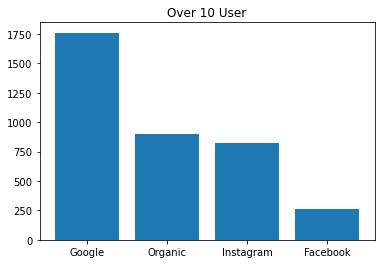

      source  user_num
0     Google     31190
1  Instagram     14402
2    Organic     10791
3   Facebook      4366


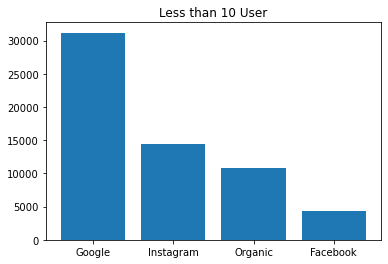

In [74]:
# 먼저 다루기 쉽도록 데이터 프레임으로 변환시킴
# 지속 유저의 source 비율. 즉 좋은 유저의 비율
USdata_3_source = pd.DataFrame(USdata_3['source'].value_counts())
USdata_3_source = USdata_3_source.reset_index()
USdata_3_source.columns = ['source', 'user_num']
print(USdata_3_source, '\n')
plt.title('Over 10 User')
plt.bar(USdata_3_source['source'], USdata_3_source['user_num'])
plt.show()

# 신규 유저의 source 비율
USdata_4_source = pd.DataFrame(USdata_4['source'].value_counts())
USdata_4_source = USdata_4_source.reset_index()
USdata_4_source.columns = ['source', 'user_num']
print(USdata_4_source)
plt.title('Less than 10 User')
plt.bar(USdata_4_source['source'], USdata_4_source['user_num'])
plt.show()

- 지속 유저는 Google, Organic 순으로 많이 사용하는 것을 볼 수 있다.
- 신규 유저는 Google 과 instagram순으로 많은 것을 볼 수 있다.
- 위 결과를 토대로 Google이 접근성과 지속성 면에서 좋은 플랫폼임을 알 수 있다.

### sales변수 활용하여 user_num등의 변수와 상관관계가 있는지 확인해 볼 것.

- 예를 들어 US 같은 경우엔 변수들 간의 어떤 상관계수가 있는지 확인해보고 이를 다른 국가들과 비교해서 결론을 도출해보자.

In [75]:
# 전체 유저중 과금 비율확인
idx = USdata_2[USdata_2['sales'] == 0].index
USdata_2_sales = USdata_2.drop(idx)
print("전체 유저 중 과금유저 비율 = ", len(USdata_2_sales)/len(USdata))

# 지속 유저중 과금 비율 확인
idx = USdata_3[USdata_3['sales'] == 0].index
USdata_3_sales = USdata_3.drop(idx)
print("지속 유저 중 과금유저 비율 = ", len(USdata_3_sales)/len(USdata_3))


# 신규 유저중 과금 비율 확인
idx = USdata_4[USdata_4['sales'] == 0].index
USdata_4_sales = USdata_4.drop(idx)
print("신규 유저 중 과금유저 비율 = ", len(USdata_4_sales)/len(USdata_4))

전체 유저 중 과금유저 비율 =  0.0030233495612267047
지속 유저 중 과금유저 비율 =  0.01627100560149373
신규 유저 중 과금유저 비율 =  0.0022057976262983754


- 위 결과를 통해 과금 비율은 지속 유저가 약 1.6%로 신규 유저보다 높은 것을 볼 수 있다.
- 이에 지속 유저를 바탕으로 과금 데이터 분석을 진행하는 것이 유의미할 것이라 판단하여 진행하였다.

### 1. source

In [76]:
# 지속 유저 중 과금 유저의 데이터
USdata_3_sales.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,38.311475,297798.655738,19.688525,18621.114754,11281.786885,17.475410,640.790776
std,21.338183,54759.291877,4.794236,14118.352115,21359.004120,75.147545,615.788650
min,10.000000,200528.000000,4.000000,1036.000000,1430.000000,0.000000,43.532258
25%,20.000000,259805.000000,16.000000,9620.000000,1539.000000,0.000000,214.810345
50%,34.000000,295989.000000,20.000000,12868.000000,5982.000000,0.000000,482.135593
75%,52.000000,331397.000000,23.000000,26885.000000,14695.000000,0.000000,796.343750
max,83.000000,393603.000000,28.000000,62522.000000,155944.000000,401.000000,3290.631579


In [77]:
# 지속 과금 유저의 유입 경로
USdata_3_sales_source = pd.DataFrame(USdata_3_sales['source'].value_counts())
USdata_3_sales_source = USdata_3_sales_source.reset_index()
USdata_3_sales_source.columns = ['source', 'user_num']
print(USdata_3_sales_source, '\n')

      source  user_num
0     Google        26
1    Organic        19
2  Instagram        13
3   Facebook         3 



In [78]:
USdata_3_source

,source,user_num
0,Google,1761
1,Organic,902
2,Instagram,824
3,Facebook,262


# * 참고: CA에서와 달리 US는 구글이 압도적으로 많음

In [79]:
# 지속 과금 유저의 비율이 유입경로 별로 어떤지 확인
print("각 source 별로 유입된 유저중 과금유저 비율")
ratio_source = []
for i in range(len(USdata_3_source)):
    for j in range(len(USdata_3_sales_source)):
        if USdata_3_source['source'][i] == USdata_3_sales_source['source'][j]:
            ratio_source.append([USdata_3_source['source'][i], USdata_3_sales_source['user_num'][j]/USdata_3_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 유입된 유저중 과금유저 비율


,0,1
0,Google,0.014764
1,Organic,0.021064
2,Instagram,0.015777
3,Facebook,0.011450


### - 위 결과를 통해 Organic이 2.1%로 가장 높은 것을 볼 수 있으며, Facebook이 가장 낮은 걸 볼 수 있다.
### - 때문에 organic과 Facebook으로 들어오는 유저에 대한 마케팅 전략을 신경써야할 것이라 판단된다.

In [80]:
USdata_3['source']

116        Organic
486        Organic
1256        Google
1349        Google
1369        Google
            ...   
617600    Facebook
617620    Facebook
617680    Facebook
617693    Facebook
617699    Facebook
Name: source, Length: 3749, dtype: object

In [81]:
# Organic, Facebook, Google, Instagram 순
# Organic
Organic_num = USdata_3['source'] == 'Organic'
Organic_num_df = USdata_3[Organic_num]
sum_of_cost_in_Organic = sum(Organic_num_df['marketing_cost_per_user'])

# Facebook
Facebook_num = USdata_3['source'] == 'Facebook'
Facebook_num_df = USdata_3[Facebook_num]
sum_of_cost_in_Facebook = sum(Facebook_num_df['marketing_cost_per_user'])

# Google
Google_num = USdata_3['source'] == 'Google'
Google_num_df = USdata_3[Google_num]
sum_of_cost_in_Google = sum(Google_num_df['marketing_cost_per_user'])

# Instagram
Instagram_num = USdata_3['source'] == 'Instagram'
Instagram_num_df = USdata_3[Instagram_num]
sum_of_cost_in_Instagram = sum(Instagram_num_df['marketing_cost_per_user'])

sum_of_cost = [sum_of_cost_in_Organic, sum_of_cost_in_Facebook, sum_of_cost_in_Google, sum_of_cost_in_Instagram]
sum_of_cost_df = pd.DataFrame(['Organic','Facebook','Google','Instagram'], columns = ['source'])
sum_of_cost_df['sum_of_cost'] = sum_of_cost

In [82]:
sum_of_cost_df

,source,sum_of_cost
0,Organic,0
1,Facebook,115636
2,Google,35
3,Instagram,11503


### - 위에서 구한 각 source별 마케팅 비용을 이용해 sales와의 비율을 확인해보자.
### - 그 전에, Organic은 마케팅 비용이 0이 소모된 것을 알 수 있다. 그렇기 때문에 이를 제외한 3곳에서 판단해보자

In [83]:
# 지속 과금유저 데이터와 비교해보자
USdata_3_sales_source['source']

0       Google
1      Organic
2    Instagram
3     Facebook
Name: source, dtype: object

In [84]:
print("각 source 별로 마케팅 비용과 과금 비율")
ratio_source = []
for i in range(len(USdata_3_sales_source)):
    for j in range(len(sum_of_cost_df)):
        if USdata_3_sales_source['source'][i] == sum_of_cost_df['source'][j]:
            if  sum_of_cost_df['sum_of_cost'][j] == 0:
                continue
            ratio_source.append([USdata_3_sales_source['source'][i], sum_of_cost_df['sum_of_cost'][j]/USdata_3_sales_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 마케팅 비용과 과금 비율


,0,1
0,Google,1.346154
1,Instagram,884.846154
2,Facebook,38545.333333


### - 위 결과를 통해 US에선 google을 통해 유입된 유저가 가장 많지만, 과금유저는 instagram과 Facebook에서 월등히 많은 것을 볼 수 있다.
- 따라서 US국가에서의 마케팅 전략으로는 google을 제외한 다른 source에서의 마케팅전략을 새로 수립해볼 필요가 있다. 혹은, google을 통한 마케팅을 더욱 강화하는 전략이 있을 수 있겠다.

### - 이제 sales와 marketing cost per user, playtime, userlevel, Playtime_days_after를 살펴보자
- 각 변수가 sales에 얼마나 영향을 끼치는지 보기위해 상관관계를 찾아보았다
- 주의할 점: source가 Organic일 땐 따로 볼 것.

In [330]:
USdata_3

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
116,83,392397,1,27,0,2020-09-26,US,Organic,0,0.325301
486,11,209160,11,899,0,2020-09-11,US,Organic,0,81.727273
1256,49,338194,15,10500,0,2020-09-18,US,Google,0,214.285714
1349,10,239935,10,11161,0,2020-09-27,US,Google,0,1116.100000
1369,51,374871,1,448,0,2020-09-11,US,Google,0,8.784314
...,...,...,...,...,...,...,...,...,...,...
617600,36,340775,2,12,0,2020-09-25,US,Facebook,514,0.333333
617620,40,266710,15,2744,0,2020-09-25,US,Facebook,514,68.600000
617680,23,361207,1,228,0,2020-09-25,US,Facebook,514,9.913043
617693,79,390946,1,306,0,2020-09-25,US,Facebook,514,3.873418


In [85]:
# Organic 빼주자
Not_Organic = USdata_3['source'] != 'Organic'
USdata_3_sales_corr = USdata_3[Not_Organic]
USdata_3_sales_corr = USdata_3_sales_corr[['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']]

# 각 변수들의 범위를 스케일링하자
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']
scale_USdata_3_sales_corr = standard_scaling(USdata_3_sales_corr, scale_columns)

scale_USdata_3_sales_corr.corr(method='pearson')

,sales,marketing_cost_per_user,playtime_sec,userlevel,Playtime_days_after
sales,1.000000,-0.011398,0.101141,0.106823,0.043945
marketing_cost_per_user,-0.011398,1.000000,0.007276,0.014835,0.007024
playtime_sec,0.101141,0.007276,1.000000,0.515242,0.768386
userlevel,0.106823,0.014835,0.515242,1.000000,0.318132
Playtime_days_after,0.043945,0.007024,0.768386,0.318132,1.000000


- 예상과 다르게 sales와 다른 변수들의 연관성이 낮게 나온 걸 확인할 수 있었다.

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# 3. UK 탐색

In [86]:
UKdata.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user
count,11834.000000,11834.000000,11834.000000,11834.000000,11834.000000,1.183400e+04
mean,2.709059,300485.301589,4.181004,2616.894119,118.504056,1.245329e+04
std,9.969222,57733.772235,4.484028,5031.906750,3006.556147,3.116417e+04
min,0.000000,200006.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,250454.250000,1.000000,251.000000,0.000000,3.317000e+03
50%,0.000000,300577.000000,1.000000,755.000000,0.000000,5.225000e+03
75%,1.000000,351092.000000,7.000000,2755.000000,0.000000,2.147600e+04
max,90.000000,399976.000000,32.000000,84003.000000,164436.000000,1.151574e+06


#### 좋은 유저의 규모는 얼마나 되는지 확인
- 위에 제시된 첫 번째 기준을 만족하는 유저의 규모를 확인할 것
- 그리고 (플레이 시간)/(가입 후 지난 날짜)를 구해 데이터프레임에 추가할 것

In [87]:
Playtime_days_after = []
for i in range(len(UKdata)):
    if UKdata.iloc[i]['days_after_registration'] >= 10: # 가입한지 10일이 지난 경우
        Playtime_days_after.append(UKdata.iloc[i]['playtime_sec']/UKdata.iloc[i]['days_after_registration'])
    else: # 가입 한지 10일이 안된 유저
        Playtime_days_after.append(-1)

In [88]:
UKdata_2 = UKdata.copy()

In [89]:
UKdata_2['Playtime_days_after'] = Playtime_days_after

In [90]:
UKdata_2

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
173,0,299797,7,298,0,2020-09-10,UK,Organic,0,-1.0
186,0,352492,3,304,0,2020-09-25,UK,Organic,0,-1.0
610,0,278631,1,1479,0,2020-09-18,UK,Organic,0,-1.0
817,0,233058,1,53,0,2020-09-27,UK,Organic,0,-1.0
956,0,241042,1,213,0,2020-09-20,UK,Organic,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
601570,0,386158,1,1488,0,2020-09-02,UK,Google,24570,-1.0
601571,0,227062,1,1088,0,2020-09-02,UK,Google,24570,-1.0
601573,0,388176,1,99,0,2020-09-02,UK,Google,24570,-1.0
601574,0,254977,1,0,0,2020-09-02,UK,Google,24570,-1.0


In [91]:
UKdata_2.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,11834.000000,11834.000000,11834.000000,11834.000000,11834.000000,1.183400e+04,11834.000000
mean,2.709059,300485.301589,4.181004,2616.894119,118.504056,1.245329e+04,11.164763
std,9.969222,57733.772235,4.484028,5031.906750,3006.556147,3.116417e+04,115.594456
min,0.000000,200006.000000,1.000000,0.000000,0.000000,0.000000e+00,-1.000000
25%,0.000000,250454.250000,1.000000,251.000000,0.000000,3.317000e+03,-1.000000
50%,0.000000,300577.000000,1.000000,755.000000,0.000000,5.225000e+03,-1.000000
75%,1.000000,351092.000000,7.000000,2755.000000,0.000000,2.147600e+04,-1.000000
max,90.000000,399976.000000,32.000000,84003.000000,164436.000000,1.151574e+06,3605.583333


#### 위 내용을 통해 UK 유저의 75% 이상이 10일 미만의 신규가입자라고 볼 수 있다.
- 먼저 신규가입 한 유저(Playtime_days_after 값이 -1인 유저)를 제외한 정확한 유저수가 얼마나 되는지 찾아보자

In [92]:
idx = UKdata_2[UKdata_2['Playtime_days_after'] == -1].index
UKdata_3 = UKdata_2.drop(idx)

In [93]:
UKdata_3 # 지속 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
958,14,333180,7,123,0,2020-09-20,UK,Organic,0,8.785714
1123,82,394157,1,186,0,2020-09-01,UK,Organic,0,2.268293
1561,68,200373,13,582,0,2020-09-11,UK,Organic,0,8.558824
4512,17,341498,1,129,0,2020-09-04,UK,Organic,0,7.588235
4571,14,337834,11,703,0,2020-09-05,UK,Organic,0,50.214286
...,...,...,...,...,...,...,...,...,...,...
601291,42,205456,15,1332,0,2020-09-02,UK,Google,24570,31.714286
601350,28,337534,18,4513,0,2020-09-02,UK,Google,24570,161.178571
601431,12,214155,2,502,0,2020-09-02,UK,Google,24570,41.833333
601443,21,233519,15,1336,0,2020-09-02,UK,Google,24570,63.619048


- 위 결과를 토대로 UK 유저는 총 11834명 중 775명이 이탈하지 않은 유저임을 알 수 있다. 
- 그렇기 때문에 유저 유입도에 비해 유저 몰입도가 떨어진다고 볼 수 있다. 
- 이에 유입 매체 비율이 어떤지 알아보았다.

### * 참고

In [94]:
# UK의 유저 유지율 계산
UK_maintained = len(UKdata_3)/len(UKdata_2)*100
UK_maintained

6.548926821024168

In [95]:
UKdata_2['source'].value_counts()

Instagram    6684
Google       2788
Organic      2322
Facebook       40
Name: source, dtype: int64

- instagram을 통해 유입된 양이 다른 매체에 비해 3배 이상 많은 것을 볼 수 있다.

In [96]:
# 신규 유저들을 토대로 매체별 비율을 보자 
idx = UKdata_2[UKdata_2['Playtime_days_after'] != -1].index
UKdata_4 = UKdata_2.drop(idx)

In [97]:
UKdata_4 # 신규 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
173,0,299797,7,298,0,2020-09-10,UK,Organic,0,-1.0
186,0,352492,3,304,0,2020-09-25,UK,Organic,0,-1.0
610,0,278631,1,1479,0,2020-09-18,UK,Organic,0,-1.0
817,0,233058,1,53,0,2020-09-27,UK,Organic,0,-1.0
956,0,241042,1,213,0,2020-09-20,UK,Organic,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
601570,0,386158,1,1488,0,2020-09-02,UK,Google,24570,-1.0
601571,0,227062,1,1088,0,2020-09-02,UK,Google,24570,-1.0
601573,0,388176,1,99,0,2020-09-02,UK,Google,24570,-1.0
601574,0,254977,1,0,0,2020-09-02,UK,Google,24570,-1.0


      source  user_num
0  Instagram       311
1    Organic       266
2     Google       196
3   Facebook         2 



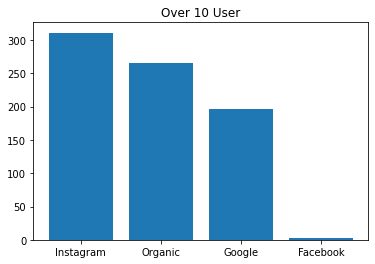

      source  user_num
0  Instagram      6373
1     Google      2592
2    Organic      2056
3   Facebook        38


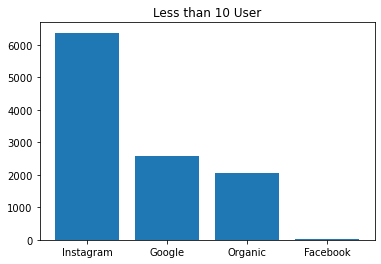

In [98]:
# 먼저 다루기 쉽도록 데이터 프레임으로 변환시킴
# 지속적인 유저의 source 비율. 즉 좋은 유저의 비율
UKdata_3_source = pd.DataFrame(UKdata_3['source'].value_counts())
UKdata_3_source = UKdata_3_source.reset_index()
UKdata_3_source.columns = ['source', 'user_num']
print(UKdata_3_source, '\n')
plt.title('Over 10 User')
plt.bar(UKdata_3_source['source'], UKdata_3_source['user_num'])
plt.show()

# 신규 유저의 source 비율
UKdata_4_source = pd.DataFrame(UKdata_4['source'].value_counts())
UKdata_4_source = UKdata_4_source.reset_index()
UKdata_4_source.columns = ['source', 'user_num']
print(UKdata_4_source)
plt.title('Less than 10 User')
plt.bar(UKdata_4_source['source'], UKdata_4_source['user_num'])
plt.show()

- 지속 유저는 instagram에서 가장 많이, 다음으로 organic을 통해 유입된 것을 볼 수 있다.
- 신규 유저의 source비율에선 instagram이 가장 높은걸 볼 수 있다.
- 위 결과를 통해 유저를 지속시키는데 영향을 미치는 source는 instagram이라고 판단할 수 있다.

### sales변수 활용하여 user_num등의 변수와 상관관계가 있는지 확인해 볼 것.

- 예를 들어 UK 같은 경우엔 변수들 간의 어떤 상관계수가 있는지 확인해보고 이를 다른 국가들과 비교해서 결론을 도출해보자.

In [99]:
# 전체 유저중 과금 비율확인
idx = UKdata_2[UKdata_2['sales'] == 0].index
UKdata_2_sales = UKdata_2.drop(idx)
print("전체 유저 중 과금유저 비율 = ", len(UKdata_2_sales)/len(UKdata))

# 지속 유저중 과금 비율 확인
idx = UKdata_3[UKdata_3['sales'] == 0].index
UKdata_3_sales = UKdata_3.drop(idx)
print("지속 유저 중 과금유저 비율 = ", len(UKdata_3_sales)/len(UKdata_3))


# 신규 유저중 과금 비율 확인
idx = UKdata_4[UKdata_4['sales'] == 0].index
UKdata_4_sales = UKdata_4.drop(idx)
print("신규 유저 중 과금유저 비율 = ", len(UKdata_4_sales)/len(UKdata_4))

전체 유저 중 과금유저 비율 =  0.008872739563968227
지속 유저 중 과금유저 비율 =  0.027096774193548386
신규 유저 중 과금유저 비율 =  0.007595623474093498


- 위 결과를 통해 과금 비율은 지속 유저가 약 2.7%로 당일 이탈 유저보다 높은 것을 볼 수 있다.
- 이에 지속 유저를 바탕으로 과금 데이터 분석을 진행하는 것이 유의미할 것이라 판단하여 진행하였다.

### 1. source

In [100]:
# 지속 유저 중 과금 유저의 데이터
UKdata_3_sales.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,45.476190,294274.047619,21.476190,20524.714286,42023.714286,6342.476190,580.251959
std,23.743671,59028.537221,4.791858,17658.564478,54384.024491,10551.315096,599.197367
min,16.000000,210961.000000,7.000000,404.000000,1589.000000,0.000000,12.625000
25%,27.000000,245357.000000,19.000000,2614.000000,3358.000000,0.000000,60.972973
50%,37.000000,293860.000000,22.000000,16866.000000,16596.000000,0.000000,443.842105
75%,66.000000,336980.000000,24.000000,34914.000000,67623.000000,5485.000000,846.431818
max,90.000000,397126.000000,28.000000,52386.000000,164436.000000,34165.000000,2085.523810


In [101]:
# 지속 과금 유저의 유입 경로
UKdata_3_sales_source = pd.DataFrame(UKdata_3_sales['source'].value_counts())
UKdata_3_sales_source = UKdata_3_sales_source.reset_index()
UKdata_3_sales_source.columns = ['source', 'user_num']
# Facebook이 0이라서 데이터프레임에 누락되어있다. 이를 0값으로 추가시켜줘야 데이터핸들링이 가능할 것.
adding = [('Facebook', 0)]
adding_df = pd.DataFrame(adding, columns = ['source', 'user_num'])
UKdata_3_sales_source = UKdata_3_sales_source.append(adding_df, ignore_index=True)
print(UKdata_3_sales_source, '\n')

      source  user_num
0    Organic        11
1  Instagram         8
2     Google         2
3   Facebook         0 



In [102]:
UKdata_3_source

,source,user_num
0,Instagram,311
1,Organic,266
2,Google,196
3,Facebook,2


In [103]:
# 지속 과금 유저의 비율이 유입경로 별로 어떤지 확인
print("각 source 별로 유입된 유저중 과금유저 비율")
ratio_source = []
for i in range(len(UKdata_3_source)):
    for j in range(len(UKdata_3_sales_source)):
        if UKdata_3_source['source'][i] == UKdata_3_sales_source['source'][j]:
            ratio_source.append([UKdata_3_source['source'][i], UKdata_3_sales_source['user_num'][j]/UKdata_3_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 유입된 유저중 과금유저 비율


,0,1
0,Instagram,0.025723
1,Organic,0.041353
2,Google,0.010204
3,Facebook,0.000000


### - 위 결과를 통해 Organic이 4.1%로 가장 높은 것을 볼 수 있으며, Facebook이 가장 낮을 걸 볼 수 있다.
### - 때문에 Organic으로 들어오는 유저에 대한 마케팅 전략을 신경써야할 것이라 판단된다.
### - 그렇다면 소위 말하는 '가성비'를 따져보기 위해서 플랫폼 별 마케팅 비용은 어떻게 되는지 알아보아야 할 것이다.

In [104]:
UKdata_3['source']

958       Organic
1123      Organic
1561      Organic
4512      Organic
4571      Organic
           ...   
601291     Google
601350     Google
601431     Google
601443     Google
601497     Google
Name: source, Length: 775, dtype: object

In [105]:
# Organic, Facebook, Google, Instagram 순
# Organic
Organic_num = UKdata_3['source'] == 'Organic'
Organic_num_df = UKdata_3[Organic_num]
sum_of_cost_in_Organic = sum(Organic_num_df['marketing_cost_per_user'])

# Facebook
Facebook_num = UKdata_3['source'] == 'Facebook'
Facebook_num_df = UKdata_3[Facebook_num]
sum_of_cost_in_Facebook = sum(Facebook_num_df['marketing_cost_per_user'])

# Google
Google_num = UKdata_3['source'] == 'Google'
Google_num_df = UKdata_3[Google_num]
sum_of_cost_in_Google = sum(Google_num_df['marketing_cost_per_user'])

# Instagram
Instagram_num = UKdata_3['source'] == 'Instagram'
Instagram_num_df = UKdata_3[Instagram_num]
sum_of_cost_in_Instagram = sum(Instagram_num_df['marketing_cost_per_user'])

sum_of_cost = [sum_of_cost_in_Organic, sum_of_cost_in_Facebook, sum_of_cost_in_Google, sum_of_cost_in_Instagram]
sum_of_cost_df = pd.DataFrame(['Organic','Facebook','Google','Instagram'], columns = ['source'])
sum_of_cost_df['sum_of_cost'] = sum_of_cost

In [106]:
sum_of_cost_df

,source,sum_of_cost
0,Organic,0
1,Facebook,676094
2,Google,6079840
3,Instagram,2031243


### - 위에서 구한 각 source별 마케팅 비용을 이용해 sales와의 비율을 확인해보자.
### - 그 전에, Organic은 마케팅 비용이 0이 소모된 것을 알 수 있다. 그렇기 때문에 이를 제외한 3곳에서 판단해보자

In [107]:
# 지속 과금유저 데이터와 비교해보자
UKdata_3_sales_source['source']

0      Organic
1    Instagram
2       Google
3     Facebook
Name: source, dtype: object

In [108]:
print("각 source 별로 마케팅 비용과 과금 비율")
ratio_source = []
for i in range(len(UKdata_3_sales_source)):
    for j in range(len(sum_of_cost_df)):
        if UKdata_3_sales_source['source'][i] == sum_of_cost_df['source'][j]:
            if  sum_of_cost_df['sum_of_cost'][j] == 0:
                continue
            ratio_source.append([UKdata_3_sales_source['source'][i], sum_of_cost_df['sum_of_cost'][j]/UKdata_3_sales_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 마케팅 비용과 과금 비율


,0,1
0,Instagram,253905.375
1,Google,3039920.000
2,Facebook,inf


### - 위 결과를 통해 UK에선 google을 통해 유입된 유저가 가장 많으며 과금 유저 또한 google이 많은 것을 볼 수 있다.
- 따라서 UK국가에서의 마케팅 전략으로는 google을 제외한 다른 source에서의 마케팅전략을 새로 수립해볼 필요가 있다. 혹은, google을 통한 마케팅을 더욱 강화하는 전략이 있을 수 있겠다.

### - 이제 sales와 marketing cost per user, playtime, userlevel, Playtime_days_after를 살펴보자
- 각 변수가 sales에 얼마나 영향을 끼치는지 보기위해 상관관계를 찾아보았다
- 주의할 점: source가 Organic일 땐 따로 볼 것.

In [109]:
UKdata_3

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
958,14,333180,7,123,0,2020-09-20,UK,Organic,0,8.785714
1123,82,394157,1,186,0,2020-09-01,UK,Organic,0,2.268293
1561,68,200373,13,582,0,2020-09-11,UK,Organic,0,8.558824
4512,17,341498,1,129,0,2020-09-04,UK,Organic,0,7.588235
4571,14,337834,11,703,0,2020-09-05,UK,Organic,0,50.214286
...,...,...,...,...,...,...,...,...,...,...
601291,42,205456,15,1332,0,2020-09-02,UK,Google,24570,31.714286
601350,28,337534,18,4513,0,2020-09-02,UK,Google,24570,161.178571
601431,12,214155,2,502,0,2020-09-02,UK,Google,24570,41.833333
601443,21,233519,15,1336,0,2020-09-02,UK,Google,24570,63.619048


In [110]:
# Organic 빼주자
Not_Organic = UKdata_3['source'] != 'Organic'
UKdata_3_sales_corr = UKdata_3[Not_Organic]
UKdata_3_sales_corr = UKdata_3_sales_corr[['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']]

# 각 변수들의 범위를 스케일링하자
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']
scale_UKdata_3_sales_corr = standard_scaling(UKdata_3_sales_corr, scale_columns)

scale_UKdata_3_sales_corr.corr(method='pearson')

,sales,marketing_cost_per_user,playtime_sec,userlevel,Playtime_days_after
sales,1.000000,-0.031700,0.312206,0.162733,0.233916
marketing_cost_per_user,-0.031700,1.000000,-0.080517,-0.085716,-0.068223
playtime_sec,0.312206,-0.080517,1.000000,0.527367,0.788048
userlevel,0.162733,-0.085716,0.527367,1.000000,0.339323
Playtime_days_after,0.233916,-0.068223,0.788048,0.339323,1.000000


- 예상과 다르게 sales와 다른 변수들의 연관성이 낮게 나온 걸 확인할 수 있었다.

# ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. RU 탐색

In [111]:
RUdata.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user
count,24284.000000,24284.000000,24284.000000,24284.000000,24284.000000,2.428400e+04
mean,2.424065,300037.155287,5.434278,3325.489911,150.992094,1.870202e+04
std,9.667986,57772.528831,4.620678,5811.076493,6236.162067,9.374571e+04
min,0.000000,200005.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,249994.750000,1.000000,289.000000,0.000000,0.000000e+00
50%,0.000000,299945.500000,5.000000,1296.000000,0.000000,1.303300e+04
75%,0.000000,350147.500000,9.000000,3927.000000,0.000000,1.956600e+04
max,90.000000,399999.000000,32.000000,85517.000000,744147.000000,4.947661e+06


#### 좋은 유저의 규모는 얼마나 되는지 확인
- 위에 제시된 첫 번째 기준을 만족하는 유저의 규모를 확인할 것
- 그리고 (플레이 시간)/(가입 후 지난 날짜)를 구해 데이터프레임에 추가할 것

In [112]:
Playtime_days_after = []
for i in range(len(RUdata)):
    if RUdata.iloc[i]['days_after_registration'] >= 10: # 가입한지 10일이 지난 경우
        Playtime_days_after.append(RUdata.iloc[i]['playtime_sec']/RUdata.iloc[i]['days_after_registration'])
    else: # 가입 한지 10일이 안된 유저
        Playtime_days_after.append(-1)

In [113]:
RUdata_2 = RUdata.copy()

In [114]:
RUdata_2['Playtime_days_after'] = Playtime_days_after

In [115]:
RUdata_2

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
8,0,338676,1,165,0,2020-09-07,RU,Organic,0,-1.000000
9,89,290942,27,1097,102253,2020-09-26,RU,Organic,0,12.325843
100,0,368607,4,1295,0,2020-09-07,RU,Organic,0,-1.000000
101,0,213239,4,2159,0,2020-09-27,RU,Organic,0,-1.000000
104,0,368999,4,2750,0,2020-09-17,RU,Organic,0,-1.000000
...,...,...,...,...,...,...,...,...,...,...
619819,0,371562,1,281,0,2020-09-21,RU,Instagram,15705,-1.000000
619820,0,353289,1,93,0,2020-09-21,RU,Instagram,15705,-1.000000
619821,16,239500,17,15661,0,2020-09-21,RU,Instagram,15705,978.812500
619909,0,284639,1,0,0,2020-09-21,RU,Instagram,15705,-1.000000


In [116]:
RUdata_2.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,24284.000000,24284.000000,24284.000000,24284.000000,24284.000000,2.428400e+04,24284.000000
mean,2.424065,300037.155287,5.434278,3325.489911,150.992094,1.870202e+04,12.507383
std,9.667986,57772.528831,4.620678,5811.076493,6236.162067,9.374571e+04,124.757698
min,0.000000,200005.000000,1.000000,0.000000,0.000000,0.000000e+00,-1.000000
25%,0.000000,249994.750000,1.000000,289.000000,0.000000,0.000000e+00,-1.000000
50%,0.000000,299945.500000,5.000000,1296.000000,0.000000,1.303300e+04,-1.000000
75%,0.000000,350147.500000,9.000000,3927.000000,0.000000,1.956600e+04,-1.000000
max,90.000000,399999.000000,32.000000,85517.000000,744147.000000,4.947661e+06,4938.769231


#### 위 내용을 통해 RU 유저의 75% 이상이 10일 미만의 신규가입자라고 볼 수 있다.
- 먼저 신규가입 한 유저(Playtime_days_after 값이 -1인 유저)를 제외한 정확한 유저수가 얼마나 되는지 찾아보자

In [117]:
idx = RUdata_2[RUdata_2['Playtime_days_after'] == -1].index
RUdata_3 = RUdata_2.drop(idx)

In [118]:
RUdata_3 # 지속 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
9,89,290942,27,1097,102253,2020-09-26,RU,Organic,0,12.325843
1083,31,379360,10,20,0,2020-09-25,RU,Organic,0,0.645161
1098,58,352837,5,170,0,2020-09-25,RU,Organic,0,2.931034
1101,77,378574,2,319,0,2020-09-26,RU,Organic,0,4.142857
1102,66,345243,2,171,0,2020-09-25,RU,Organic,0,2.590909
...,...,...,...,...,...,...,...,...,...,...
619537,43,257581,23,56852,0,2020-09-21,RU,Instagram,15705,1322.139535
619642,27,386766,19,5477,0,2020-09-21,RU,Instagram,15705,202.851852
619746,13,255811,12,167,0,2020-09-21,RU,Instagram,15705,12.846154
619752,46,278983,21,3620,0,2020-09-21,RU,Instagram,15705,78.695652


- 위 결과를 토대로 캐나다 유저는 총 24284명 중 1415명이 지속 유저임을 알 수 있다. 
- 이에 유입 매체 비율이 어떤지 알아보았다.

### * 참고

In [119]:
# RU의 유저 유지율 계산
RU_maintained = len(RUdata_3)/len(RUdata_2)*100
RU_maintained

5.826881897545709

In [120]:
RUdata_2['source'].value_counts()

Instagram    18953
Organic       2977
Google        2269
Facebook        85
Name: source, dtype: int64

- instagram을 통해 유입된 양이 다른 매체에 비해 월등히 많은 것을 볼 수 있다.
- 그리고 이를 토대로 유입 매체 비율을 살펴보았다.

In [121]:
# 신규 유저들을 토대로 매체별 비율을 보자 
idx = RUdata_2[RUdata_2['Playtime_days_after'] != -1].index
RUdata_4 = RUdata_2.drop(idx)

In [122]:
RUdata_4 # 신규 유저 데이터

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
8,0,338676,1,165,0,2020-09-07,RU,Organic,0,-1.0
100,0,368607,4,1295,0,2020-09-07,RU,Organic,0,-1.0
101,0,213239,4,2159,0,2020-09-27,RU,Organic,0,-1.0
104,0,368999,4,2750,0,2020-09-17,RU,Organic,0,-1.0
105,2,237080,7,152,0,2020-09-05,RU,Organic,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
619818,0,298124,6,634,0,2020-09-21,RU,Instagram,15705,-1.0
619819,0,371562,1,281,0,2020-09-21,RU,Instagram,15705,-1.0
619820,0,353289,1,93,0,2020-09-21,RU,Instagram,15705,-1.0
619909,0,284639,1,0,0,2020-09-21,RU,Instagram,15705,-1.0


      source  user_num
0  Instagram       974
1    Organic       288
2     Google       146
3   Facebook         7 



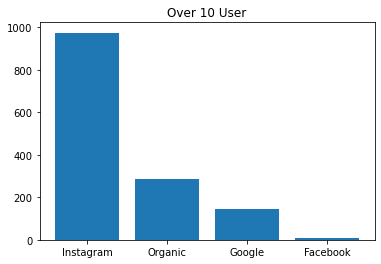

      source  user_num
0  Instagram     17979
1    Organic      2689
2     Google      2123
3   Facebook        78


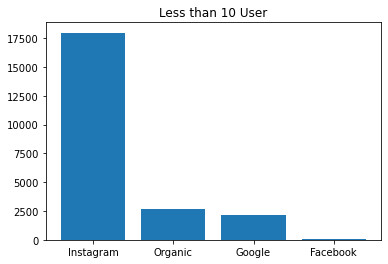

In [123]:
# 지속적인 유저의 source 비율. 즉 좋은 유저의 비율
# 먼저 다루기 쉽도록 데이터 프레임으로 변환시킴
RUdata_3_source = pd.DataFrame(RUdata_3['source'].value_counts())
RUdata_3_source = RUdata_3_source.reset_index()
RUdata_3_source.columns = ['source', 'user_num']
print(RUdata_3_source, '\n')
plt.title('Over 10 User')
plt.bar(RUdata_3_source['source'], RUdata_3_source['user_num'])
plt.show()

# 신규 유저의 source 비율
RUdata_4_source = pd.DataFrame(RUdata_4['source'].value_counts())
RUdata_4_source = RUdata_4_source.reset_index()
RUdata_4_source.columns = ['source', 'user_num']
print(RUdata_4_source)
plt.title('Less than 10 User')
plt.bar(RUdata_4_source['source'], RUdata_4_source['user_num'])
plt.show()

- 신규 유저와 지속 유저 모두 instagram에서 가장 많이 유입된 것을 볼 수 있다.
- 위 결과를 통해 유저를 지속시키는데 영향을 미치는 source는 instagram이라고 판단할 수 있다.

### sales변수 활용하여 user_num등의 변수와 상관관계가 있는지 확인해 볼 것.

- 예를 들어 RU 같은 경우엔 변수들 간의 어떤 상관계수가 있는지 확인해보고 이를 다른 국가들과 비교해서 결론을 도출해보자.

In [124]:
# 전체 유저중 과금 비율확인
idx = RUdata_2[RUdata_2['sales'] == 0].index
RUdata_2_sales = RUdata_2.drop(idx)
print("전체 유저 중 과금유저 비율 = ", len(RUdata_2_sales)/len(RUdata))

# 지속 유저중 과금 비율 확인
idx = RUdata_3[RUdata_3['sales'] == 0].index
RUdata_3_sales = RUdata_3.drop(idx)
print("지속 유저 중 과금유저 비율 = ", len(RUdata_3_sales)/len(RUdata_3))


# 신규 유저중 과금 비율 확인
idx = RUdata_4[RUdata_4['sales'] == 0].index
RUdata_4_sales = RUdata_4.drop(idx)
print("신규 유저 중 과금유저 비율 = ", len(RUdata_4_sales)/len(RUdata_4))

전체 유저 중 과금유저 비율 =  0.009430077417229451
지속 유저 중 과금유저 비율 =  0.033215547703180213
신규 유저 중 과금유저 비율 =  0.00795837159473523


- 위 결과를 통해 과금 비율은 지속 유저가 약 3.3%로 당일 이탈 유저보다 높은 것을 볼 수 있다.
- 이에 지속 유저를 바탕으로 과금 데이터 분석을 진행하는 것이 유의미할 것이라 판단하여 진행하였다.

### 1. source

In [125]:
# 지속 유저 중 과금 유저의 데이터
RUdata_3_sales.describe()

,days_after_registration,userid,userlevel,playtime_sec,sales,marketing_cost_per_user,Playtime_days_after
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,43.617021,299725.808511,21.744681,23503.234043,36962.829787,26354.489362,717.256359
std,26.747250,59897.934427,5.658653,21614.470828,109273.296525,100591.434160,795.848489
min,10.000000,200264.000000,4.000000,707.000000,1313.000000,0.000000,12.325843
25%,19.000000,252934.500000,18.500000,5541.500000,2792.000000,0.000000,148.199390
50%,35.000000,291132.000000,23.000000,19263.000000,8389.000000,0.000000,482.666667
75%,72.500000,348540.000000,26.000000,36716.000000,30195.500000,19668.000000,984.216087
max,89.000000,398909.000000,30.000000,81416.000000,744147.000000,680790.000000,3575.833333


In [126]:
# 지속 과금 유저의 유입 경로
RUdata_3_sales_source = pd.DataFrame(RUdata_3_sales['source'].value_counts())
RUdata_3_sales_source = RUdata_3_sales_source.reset_index()
RUdata_3_sales_source.columns = ['source', 'user_num']
print(RUdata_3_sales_source, '\n')

      source  user_num
0  Instagram        27
1    Organic        15
2     Google         4
3   Facebook         1 



In [127]:
RUdata_3_source

,source,user_num
0,Instagram,974
1,Organic,288
2,Google,146
3,Facebook,7


# * 참고: CA에서와 달리 RU는 구글이 압도적으로 많음

In [128]:
# 지속 과금 유저의 비율이 유입경로 별로 어떤지 확인
print("각 source 별로 유입된 유저중 과금유저 비율")
ratio_source = []
for i in range(len(RUdata_3_source)):
    for j in range(len(RUdata_3_sales_source)):
        if RUdata_3_source['source'][i] == RUdata_3_sales_source['source'][j]:
            ratio_source.append([RUdata_3_source['source'][i], RUdata_3_sales_source['user_num'][j]/RUdata_3_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 유입된 유저중 과금유저 비율


,0,1
0,Instagram,0.027721
1,Organic,0.052083
2,Google,0.027397
3,Facebook,0.142857


### - 위 결과를 통해 Facebook이 1.4%로 가장 높은 것을 볼 수 있으며, instagram, google이 가장 낮은 걸 볼 수 있다.
### - 때문에 instagram, google로 들어오는 유저에 대한 마케팅 전략을 신경써야할 것이라 판단된다.
### - 그렇다면 소위 말하는 '가성비'를 따져보기 위해서 플랫폼 별 마케팅 비용은 어떻게 되는지 알아보아야 할 것이다.

In [129]:
RUdata_3['source']

9           Organic
1083        Organic
1098        Organic
1101        Organic
1102        Organic
            ...    
619537    Instagram
619642    Instagram
619746    Instagram
619752    Instagram
619821    Instagram
Name: source, Length: 1415, dtype: object

In [130]:
# Organic, Facebook, Google, Instagram 순
# Organic
Organic_num = RUdata_3['source'] == 'Organic'
Organic_num_df = RUdata_3[Organic_num]
sum_of_cost_in_Organic = sum(Organic_num_df['marketing_cost_per_user'])

# Facebook
Facebook_num = RUdata_3['source'] == 'Facebook'
Facebook_num_df = RUdata_3[Facebook_num]
sum_of_cost_in_Facebook = sum(Facebook_num_df['marketing_cost_per_user'])

# Google
Google_num = RUdata_3['source'] == 'Google'
Google_num_df = RUdata_3[Google_num]
sum_of_cost_in_Google = sum(Google_num_df['marketing_cost_per_user'])

# Instagram
Instagram_num = RUdata_3['source'] == 'Instagram'
Instagram_num_df = RUdata_3[Instagram_num]
sum_of_cost_in_Instagram = sum(Instagram_num_df['marketing_cost_per_user'])

sum_of_cost = [sum_of_cost_in_Organic, sum_of_cost_in_Facebook, sum_of_cost_in_Google, sum_of_cost_in_Instagram]
sum_of_cost_df = pd.DataFrame(['Organic','Facebook','Google','Instagram'], columns = ['source'])
sum_of_cost_df['sum_of_cost'] = sum_of_cost

In [131]:
sum_of_cost_df

,source,sum_of_cost
0,Organic,0
1,Facebook,3443616
2,Google,8787535
3,Instagram,12018713


### - 위에서 구한 각 source별 마케팅 비용을 이용해 sales와의 비율을 확인해보자.
### - 그 전에, Organic은 마케팅 비용이 0이 소모된 것을 알 수 있다. 그렇기 때문에 이를 제외한 3곳에서 판단해보자

In [132]:
# 지속 과금유저 데이터와 비교해보자
RUdata_3_sales_source['source']

0    Instagram
1      Organic
2       Google
3     Facebook
Name: source, dtype: object

In [133]:
print("각 source 별로 마케팅 비용과 과금 비율")
ratio_source = []
for i in range(len(RUdata_3_sales_source)):
    for j in range(len(sum_of_cost_df)):
        if RUdata_3_sales_source['source'][i] == sum_of_cost_df['source'][j]:
            if  sum_of_cost_df['sum_of_cost'][j] == 0:
                continue
            ratio_source.append([RUdata_3_sales_source['source'][i], sum_of_cost_df['sum_of_cost'][j]/RUdata_3_sales_source['user_num'][i]])
ratio_source = pd.DataFrame(ratio_source)
ratio_source

각 source 별로 마케팅 비용과 과금 비율


,0,1
0,Instagram,4.451375e+05
1,Google,2.196884e+06
2,Facebook,3.443616e+06


### - 이제 sales와 marketing cost per user, playtime, userlevel, Playtime_days_after를 살펴보았다.
- 각 변수가 sales에 얼마나 영향을 끼치는지 보기위해 상관관계를 찾아보았다
- 주의할 점: source가 Organic일 땐 따로 볼 것.

In [134]:
RUdata_3

,days_after_registration,userid,userlevel,playtime_sec,sales,registration_date,country,source,marketing_cost_per_user,Playtime_days_after
9,89,290942,27,1097,102253,2020-09-26,RU,Organic,0,12.325843
1083,31,379360,10,20,0,2020-09-25,RU,Organic,0,0.645161
1098,58,352837,5,170,0,2020-09-25,RU,Organic,0,2.931034
1101,77,378574,2,319,0,2020-09-26,RU,Organic,0,4.142857
1102,66,345243,2,171,0,2020-09-25,RU,Organic,0,2.590909
...,...,...,...,...,...,...,...,...,...,...
619537,43,257581,23,56852,0,2020-09-21,RU,Instagram,15705,1322.139535
619642,27,386766,19,5477,0,2020-09-21,RU,Instagram,15705,202.851852
619746,13,255811,12,167,0,2020-09-21,RU,Instagram,15705,12.846154
619752,46,278983,21,3620,0,2020-09-21,RU,Instagram,15705,78.695652


In [135]:
# Organic 빼주자
Not_Organic = RUdata_3['source'] != 'Organic'
RUdata_3_sales_corr = RUdata_3[Not_Organic]
RUdata_3_sales_corr = RUdata_3_sales_corr[['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']]

# 각 변수들의 범위를 스케일링하자
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df
scale_columns = ['sales','marketing_cost_per_user','playtime_sec','userlevel','Playtime_days_after']
scale_RUdata_3_sales_corr = standard_scaling(RUdata_3_sales_corr, scale_columns)

scale_RUdata_3_sales_corr.corr(method='pearson')

,sales,marketing_cost_per_user,playtime_sec,userlevel,Playtime_days_after
sales,1.000000,0.034750,0.214670,0.113094,0.094371
marketing_cost_per_user,0.034750,1.000000,-0.033782,-0.053565,-0.038640
playtime_sec,0.214670,-0.033782,1.000000,0.552695,0.779296
userlevel,0.113094,-0.053565,0.552695,1.000000,0.366792
Playtime_days_after,0.094371,-0.038640,0.779296,0.366792,1.000000
